In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
df = pd.read_csv('Mall_Customers.csv')

In [2]:
df.drop(['CustomerID'], axis = 1, inplace = True)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


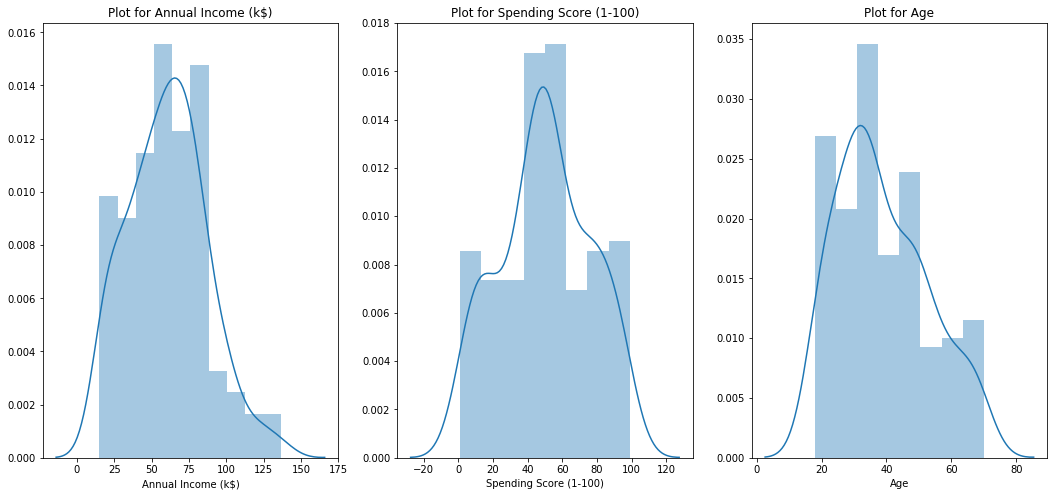

In [3]:
plt.figure(figsize = (18, 8))
n = 0
for x in ['Annual Income (k$)', 'Spending Score (1-100)', 'Age']:
    n+=1
    plt.subplot(1, 3, n)
    sns.distplot(df[x])
    plt.title(f'Plot for {x}')
plt.show()

In [4]:
#Most of the people have their annual income in the bracket of 50k-80k and spending score is profound between 40 and 60
#Young people are found to be more active in visiting the mall,the number drops when people get older.

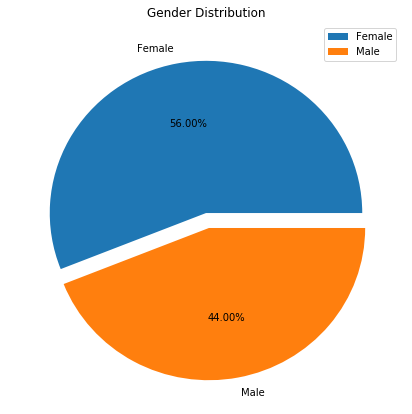

In [5]:
labels = ['Female', 'Male']
explode = (0, 0.1)
size = df['Gender'].value_counts()
plt.figure(figsize = (7, 7))
plt.pie(size, explode = explode, labels = labels, autopct = '%.2f%%')
plt.title('Gender Distribution')
plt.legend()
plt.show()

In [6]:
#The fraction of women attending the mall is slightly higher as compared to men.
#Next we'll try to find the correlation between the variables.

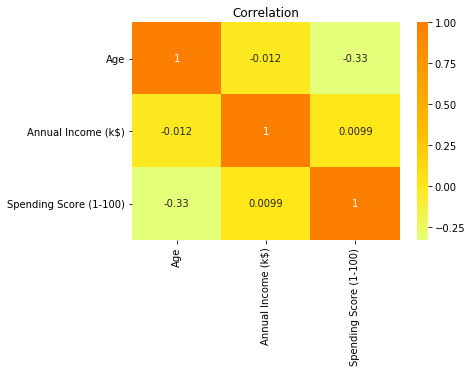

In [7]:
sns.heatmap(df.corr(), cmap = 'Wistia', annot = True)
plt.title('Correlation')
plt.show()

In [8]:
#There is no evident correlation between our variables.
#Let's check if there's some correlation between gender and Spending Score.

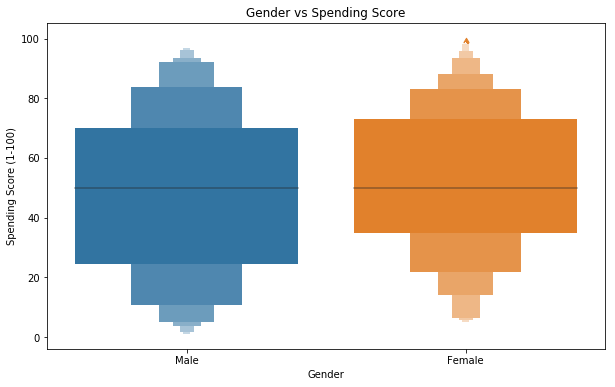

In [9]:
plt.figure(figsize = (10, 6))
sns.boxenplot(df['Gender'], df['Spending Score (1-100)'])
plt.title('Gender vs Spending Score')
plt.show()

In [10]:
#The average spending score for men is between 25 to 70 whereas for women the range is between 35 to 75 making
#women ahead of men in shopping. It'd be wise to hold your girlfriend's hand while in the mall.

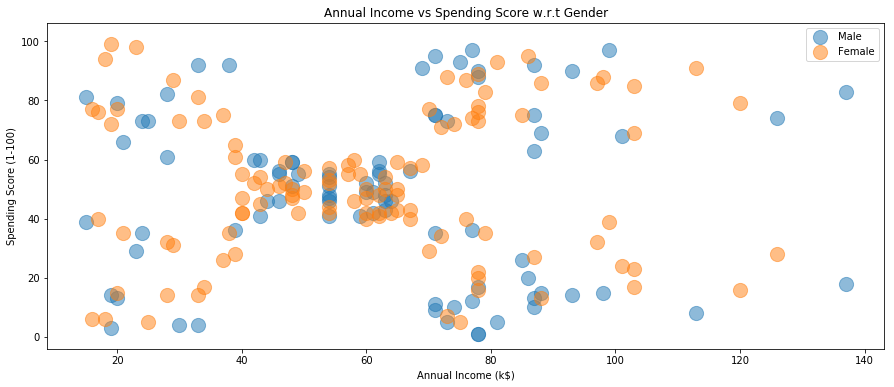

In [11]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

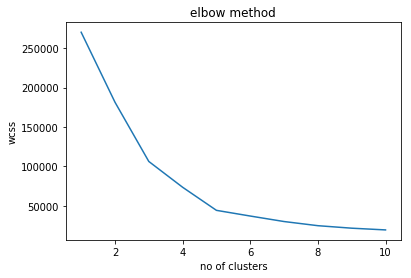

In [12]:
x = df.iloc[:, [2, 3]].values
wcss = []
for n in range(1, 11):
    km = KMeans(n_clusters = n, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0 )
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()


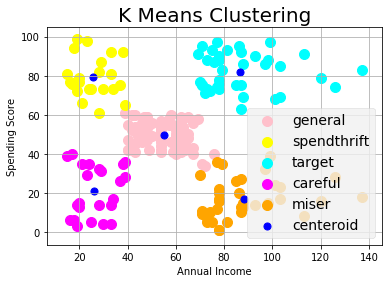

In [13]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'general')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'spendthrift')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'careful')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'miser')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()